In [1]:
import numpy as np
import pandas as pd

from pandas import read_csv

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML



import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn.decomposition import pca
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


import scipy

from scipy.stats.stats import spearmanr
from scipy.stats import chi2_contingency

%matplotlib inline

In [15]:
df = pd.read_csv('bank-full.csv', delimiter = ';')


In [16]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
labelencoder = LabelEncoder()
df['age'] = labelencoder.fit_transform(df['age'])
df['job'] = labelencoder.fit_transform(df['job'])
df['marital'] = labelencoder.fit_transform(df['marital'])
df['education'] = labelencoder.fit_transform(df['education'])
df['default'] = labelencoder.fit_transform(df['default'])
df['housing'] = labelencoder.fit_transform(df['housing'])
df['loan'] = labelencoder.fit_transform(df['loan'])

df['y'] = labelencoder.fit_transform(df['y'])

In [18]:
df_1 = df[['age','marital','education','job','balance','default','housing','loan','duration','campaign','pdays','previous','y']]
df_1.head()

,age,marital,education,job,balance,default,housing,loan,duration,campaign,pdays,previous,y
0,40,1,2,4,2143,0,1,0,261,1,-1,0,0
1,26,2,1,9,29,0,1,0,151,1,-1,0,0
2,15,1,1,2,2,0,1,1,76,1,-1,0,0
3,29,1,3,1,1506,0,1,0,92,1,-1,0,0
4,15,2,3,11,1,0,0,0,198,1,-1,0,0


In [19]:

# Separating out the target

y = df_1.iloc[:,-1].values

# Separating out the features

X = df_1.iloc[:,:12].values


y

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
# Resampling the minority to have the same number of sample with majority with synthetic resampling with KNN
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X, y = smote.fit_sample(X, y)

In [21]:
# Standardizing the features
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X = pca.fit_transform(X)

pca.explained_variance_ratio_

/home/seggs/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/seggs/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 0.13140875,  0.12588992,  0.11025172,  0.09583382,  0.08389621,
        0.07805246,  0.07671797,  0.07265025])

In [22]:
y = y.ravel()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)



In [23]:
model = BernoulliNB(binarize= True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

0.673868119481


array([[3752, 4233],
       [ 975, 7009]])

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

('Accuracy:', 0.67386811948149539)
('Precision:', 0.62346557552037007)
('Recall:', 0.87788076152304606)


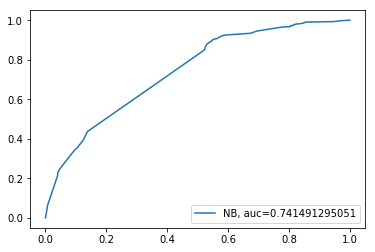

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="NB, auc="+str(auc))
plt.legend(loc=4)
plt.show()